Import train and test dataset on which we need to perform the analysis.

In [78]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_train = pd.read_csv("D:\\Tarun\\UTS\\Subjects\\ADV ML\\NBA-Drafted-Player\\src\\models\\train.csv")
df_test = pd.read_csv("D:\\Tarun\\UTS\\Subjects\\ADV ML\\NBA-Drafted-Player\\src\\models\\test.csv")

D:\Tarun\TemporaryFiles\ipykernel_7688\4260756425.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("D:\\Tarun\\UTS\\Subjects\\ADV ML\\advmla-2023-spring\\train.csv")


In [79]:
df_train.head(5)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.4,1.6,4.6,15.8,16.3,10,14,0.7,26,68,0.4,13,39,0.3,0.3,1.5,13.1,So,2-Jun,NaN,0.3,89.4,2.5,2009,all,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.3,108.5,0.9,50.0,-5.0,-1.6,-3.4,-4.7,14.6,-2.8,-1.9,0.2,0.6,0.8,1.2,0.3,0.0,3.9,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.5,3.8,6.3,13.6,19.8,30,45,0.7,56,113,0.5,20,51,0.4,1.0,1.1,27.4,So,4-Jun,NaN,1.3,100.1,3.4,2009,all,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.1,104.0,1.9,111.9,0.6,1.4,-0.8,-0.3,24.5,-0.1,-0.2,0.7,1.3,1.9,1.8,0.4,0.2,5.9,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,48.0,2.1,8.0,14.7,15.9,45,67,0.7,67,157,0.4,50,154,0.3,0.0,0.9,21.5,Sr,4-Jun,NaN,2.3,104.1,1.7,2009,all,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.6,102.2,2.8,115.0,0.0,1.0,-1.0,0.7,33.2,1.5,-0.9,0.6,2.3,3.0,2.0,0.5,0.0,12.2,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.7,4.1,9.4,13.7,23.8,14,27,0.5,25,63,0.4,28,62,0.5,0.8,1.9,21.6,Sr,4-Jun,NaN,0.6,93.2,2.0,2009,all,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.9,106.6,1.2,84.2,-1.0,-0.5,-0.5,-0.7,18.0,-0.3,-0.4,0.7,1.4,2.1,1.1,0.6,0.1,4.9,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.3,8.3,18.6,8.2,22.7,64,114,0.6,93,176,0.5,0,0,0.0,1.9,1.3,64.8,Sr,8-Jun,NaN,1.1,97.9,3.8,2009,all,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.1,100.7,2.0,128.0,-1.8,-1.9,0.1,-2.4,22.9,-1.7,-0.7,1.4,3.3,4.7,0.8,0.5,0.3,7.6,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [80]:
df_train.shape

(56091, 64)

Analyse the dataset and its features. This will help to understand which features we need to select for the model.

In [81]:
columns = df_train.columns
print(len(columns))
print(columns)

64
Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe', 'pfr', 'year',
       'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts',
       'player_id', 'drafted'],
      dtype='object')


Check if there is any missing data in both the datasets(train and test dataset).

In [82]:
df_train.isna().sum()

team                       0
conf                       0
GP                         0
Min_per                    0
Ortg                       0
usg                        0
eFG                        0
TS_per                     0
ORB_per                    0
DRB_per                    0
AST_per                    0
TO_per                     0
FTM                        0
FTA                        0
FT_per                     0
twoPM                      0
twoPA                      0
twoP_per                   0
TPM                        0
TPA                        0
TP_per                     0
blk_per                    0
stl_per                    0
ftr                        0
yr                       274
ht                        80
num                     4669
porpag                     0
adjoe                      0
pfr                        0
year                       0
type                       0
Rec_Rank               39055
ast_tov                 4190
rimmade       

Now, for the preprocessing and feature selection, I have dropped some of the irrelevant features.

**yr** - student year of study. AS we are comparing the matches and goals, so year of study is not needed for analysis.

**ht** - height of student. Height of student does not matters to analyse its performance.

**Rec_Rank** - majority of the data is NAN so we can drop this feature as it is containing barely any information.

**dunks_ratio** - again, majority of the data is NAN, so have dropped and its corresponding columns.

Some other columns have dropped based on the missing data and feature irrelevant for the target variable.

In [83]:
cols_to_drop = ['yr', 'ht', 'num', 'Rec_Rank', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'ast_tov']

In [84]:
df_train = df_train.drop(df_train.columns.intersection(cols_to_drop), axis=1)
df_test = df_test.drop(df_test.columns.intersection(cols_to_drop), axis=1)

Again, check for the missing data for the remaining features and perform missing data treatment.

In [85]:
missing_data_train = df_train.isna().sum().sort_values(ascending=False)
missing_data_test = df_test.isna().sum().sort_values(ascending=False)

In [10]:
missing_data_train

dgbpm        44
drtg         44
dporpag      44
stops        44
bpm          44
obpm         44
dbpm         44
gbpm         44
ogbpm        44
adrtg        44
oreb         38
dreb         38
treb         38
ast          38
stl          38
blk          38
pts          38
mp           38
type          0
year          0
team          0
adjoe         0
player_id     0
pfr           0
porpag        0
conf          0
ftr           0
GP            0
Min_per       0
Ortg          0
usg           0
eFG           0
TS_per        0
ORB_per       0
DRB_per       0
AST_per       0
TO_per        0
FTM           0
FTA           0
FT_per        0
twoPM         0
twoPA         0
twoP_per      0
TPM           0
TPA           0
TP_per        0
blk_per       0
stl_per       0
drafted       0
dtype: int64

In [86]:
def remove_missing_data(col, df):
    df[col] = df[col].fillna(df[col].mean())
    return df

In [87]:
def missing_data_treatment(missing_data, df):
    i = 0
    while missing_data.values[i] > 0:
        df = remove_missing_data(missing_data.keys()[i], df)
        i += 1
    return df

In [88]:
df_train = missing_data_treatment(missing_data_train, df_train)
df_test = missing_data_treatment(missing_data_train, df_test)

In [89]:
df_X_train.head(5)

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,le_player_id
0,26,29.5,97.3,16.6,42.5,44.4,1.6,4.6,15.8,16.3,10,14,0.7,26,68,0.4,13,39,0.3,0.3,1.5,13.1,0.3,89.4,2.5,2009,108.3,108.5,0.9,50.0,-5.0,-1.6,-3.4,-4.7,14.6,-2.8,-1.9,0.2,0.6,0.8,1.2,0.3,0.0,3.9,11624
1,34,60.9,108.3,14.9,52.4,54.5,3.8,6.3,13.6,19.8,30,45,0.7,56,113,0.5,20,51,0.4,1.0,1.1,27.4,1.3,100.1,3.4,2009,105.1,104.0,1.9,111.9,0.6,1.4,-0.8,-0.3,24.5,-0.1,-0.2,0.7,1.3,1.9,1.8,0.4,0.2,5.9,9244
2,27,72.0,96.2,21.8,45.7,48.0,2.1,8.0,14.7,15.9,45,67,0.7,67,157,0.4,50,154,0.3,0.0,0.9,21.5,2.3,104.1,1.7,2009,107.6,102.2,2.8,115.0,0.0,1.0,-1.0,0.7,33.2,1.5,-0.9,0.6,2.3,3.0,2.0,0.5,0.0,12.2,22465
3,30,44.5,97.7,16.0,53.6,53.7,4.1,9.4,13.7,23.8,14,27,0.5,25,63,0.4,28,62,0.5,0.8,1.9,21.6,0.6,93.2,2.0,2009,108.9,106.6,1.2,84.2,-1.0,-0.5,-0.5,-0.7,18.0,-0.3,-0.4,0.7,1.4,2.1,1.1,0.6,0.1,4.9,1995
4,33,56.2,96.5,22.0,52.8,54.3,8.3,18.6,8.2,22.7,64,114,0.6,93,176,0.5,0,0,0.0,1.9,1.3,64.8,1.1,97.9,3.8,2009,101.1,100.7,2.0,128.0,-1.8,-1.9,0.1,-2.4,22.9,-1.7,-0.7,1.4,3.3,4.7,0.8,0.5,0.3,7.6,15559


Now, perform feature selection by using Pearson Correlation Coefficients technique

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
cor = df_X_train.corr()

In [92]:
cor

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,le_player_id
GP,1.0,0.8,0.4,0.2,0.4,0.4,-0.0,0.0,0.2,-0.0,0.6,0.6,0.6,0.6,0.6,0.4,0.5,0.5,0.3,0.0,0.0,0.0,0.5,0.5,-0.1,-0.0,-0.1,-0.1,0.7,0.8,0.5,0.5,0.3,0.4,0.7,0.4,0.3,0.4,0.6,0.6,0.4,0.5,0.3,0.6,-0.0
Min_per,0.8,1.0,0.4,0.3,0.3,0.4,-0.1,0.0,0.3,-0.1,0.8,0.8,0.6,0.8,0.8,0.3,0.7,0.7,0.4,-0.0,0.1,-0.0,0.7,0.5,-0.2,-0.0,-0.0,-0.1,0.8,1.0,0.4,0.5,0.2,0.4,1.0,0.4,0.2,0.5,0.8,0.7,0.7,0.8,0.3,0.9,-0.0
Ortg,0.4,0.4,1.0,0.2,0.8,0.8,0.1,0.0,0.2,-0.3,0.3,0.3,0.5,0.3,0.3,0.6,0.3,0.3,0.4,0.0,0.0,0.1,0.5,1.0,-0.0,0.0,-0.1,-0.1,0.4,0.4,0.6,0.7,0.1,0.7,0.4,0.7,0.4,0.3,0.4,0.4,0.3,0.3,0.2,0.4,-0.0
usg,0.2,0.3,0.2,1.0,0.2,0.2,0.1,0.1,0.3,0.1,0.5,0.5,0.3,0.5,0.5,0.2,0.3,0.3,0.2,-0.0,0.1,0.1,0.4,0.4,-0.0,-0.0,-0.1,-0.1,0.4,0.4,-0.0,0.0,-0.1,0.1,0.4,0.1,-0.1,0.3,0.4,0.4,0.3,0.4,0.1,0.5,-0.0
eFG,0.4,0.3,0.8,0.2,1.0,0.9,0.0,0.1,0.1,-0.1,0.3,0.3,0.3,0.3,0.3,0.7,0.2,0.2,0.4,0.1,0.0,0.1,0.4,0.8,-0.0,0.0,-0.1,-0.1,0.3,0.3,0.5,0.6,0.2,0.6,0.4,0.6,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.4,-0.0
TS_per,0.4,0.4,0.8,0.2,0.9,1.0,0.0,0.1,0.1,-0.1,0.3,0.3,0.5,0.3,0.3,0.7,0.3,0.2,0.4,0.0,0.0,0.2,0.5,0.8,-0.0,0.0,-0.1,-0.1,0.4,0.4,0.5,0.6,0.1,0.6,0.4,0.6,0.4,0.3,0.3,0.3,0.2,0.3,0.2,0.4,-0.0
ORB_per,-0.0,-0.1,0.1,0.1,0.0,0.0,1.0,0.5,-0.1,-0.0,-0.0,0.0,-0.1,0.1,0.0,0.1,-0.2,-0.2,-0.2,0.6,0.2,0.1,0.0,0.1,0.6,-0.0,-0.5,-0.5,-0.0,-0.0,0.3,0.2,0.4,0.0,-0.1,0.1,-0.0,0.3,0.1,0.2,-0.1,-0.1,0.2,-0.0,-0.0
DRB_per,0.0,0.0,0.0,0.1,0.1,0.1,0.5,1.0,-0.1,-0.0,0.1,0.1,-0.0,0.1,0.1,0.1,-0.1,-0.1,-0.1,0.6,0.1,0.1,0.1,0.1,0.5,0.0,-0.7,-0.6,0.1,0.1,0.2,-0.0,0.4,0.1,0.0,-0.0,0.2,0.2,0.3,0.3,-0.1,-0.0,0.2,0.1,0.0
AST_per,0.2,0.3,0.2,0.3,0.1,0.1,-0.1,-0.1,1.0,0.1,0.3,0.3,0.2,0.2,0.3,0.0,0.3,0.3,0.3,-0.1,0.2,-0.0,0.3,0.3,-0.1,-0.0,-0.0,-0.0,0.3,0.3,0.2,0.3,0.0,0.3,0.4,0.3,0.2,-0.1,0.2,0.1,0.7,0.4,-0.1,0.3,-0.0
TO_per,-0.0,-0.1,-0.3,0.1,-0.1,-0.1,-0.0,-0.0,0.1,1.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.0,-0.2,-0.2,-0.1,0.0,0.0,0.1,-0.3,-0.3,0.1,-0.1,-0.0,0.0,-0.1,-0.1,-0.3,-0.5,0.1,-0.3,-0.1,-0.4,-0.1,-0.1,-0.1,-0.1,-0.0,-0.1,-0.1,-0.2,0.0


Drop the features which are highly correlated. Ideally, we took a threshold of 0.5 and drop the features which are having more 0.5 correlation.

In [93]:
df_X_train = df_X_train.drop(['Min_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'dporpag', 'stops', 'mp', 'dreb', 'treb', 'pts'], axis='columns')

Now, seperate the input variable and the target variable along with the name of the team and name of conference. As, these columns are needed for analysis.

In [94]:
df_X_train = df_train.drop(['team', 'conf', 'type', 'drafted'], axis='columns')
df_X_test = df_test.drop(['team', 'conf', 'type'], axis='columns')

In [95]:
df_Y_train = df_train.drafted

In [96]:
print(df_X_train.shape)
print(df_Y_train.shape)

(56091, 45)
(56091,)


In [97]:
df_X_train.head(5)

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,26,29.5,97.3,16.6,42.5,44.4,1.6,4.6,15.8,16.3,10,14,0.7,26,68,0.4,13,39,0.3,0.3,1.5,13.1,0.3,89.4,2.5,2009,108.3,108.5,0.9,50.0,-5.0,-1.6,-3.4,-4.7,14.6,-2.8,-1.9,0.2,0.6,0.8,1.2,0.3,0.0,3.9,7be2aead-da4e-4d13-a74b-4c1e692e2368
1,34,60.9,108.3,14.9,52.4,54.5,3.8,6.3,13.6,19.8,30,45,0.7,56,113,0.5,20,51,0.4,1.0,1.1,27.4,1.3,100.1,3.4,2009,105.1,104.0,1.9,111.9,0.6,1.4,-0.8,-0.3,24.5,-0.1,-0.2,0.7,1.3,1.9,1.8,0.4,0.2,5.9,61de55d9-1582-4ea4-b593-44f6aa6524a6
2,27,72.0,96.2,21.8,45.7,48.0,2.1,8.0,14.7,15.9,45,67,0.7,67,157,0.4,50,154,0.3,0.0,0.9,21.5,2.3,104.1,1.7,2009,107.6,102.2,2.8,115.0,0.0,1.0,-1.0,0.7,33.2,1.5,-0.9,0.6,2.3,3.0,2.0,0.5,0.0,12.2,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655
3,30,44.5,97.7,16.0,53.6,53.7,4.1,9.4,13.7,23.8,14,27,0.5,25,63,0.4,28,62,0.5,0.8,1.9,21.6,0.6,93.2,2.0,2009,108.9,106.6,1.2,84.2,-1.0,-0.5,-0.5,-0.7,18.0,-0.3,-0.4,0.7,1.4,2.1,1.1,0.6,0.1,4.9,14f05660-bb3c-4868-b3dd-09bcdb64279d
4,33,56.2,96.5,22.0,52.8,54.3,8.3,18.6,8.2,22.7,64,114,0.6,93,176,0.5,0,0,0.0,1.9,1.3,64.8,1.1,97.9,3.8,2009,101.1,100.7,2.0,128.0,-1.8,-1.9,0.1,-2.4,22.9,-1.7,-0.7,1.4,3.3,4.7,0.8,0.5,0.3,7.6,a58db52f-fbba-4e7b-83d0-371efcfed039


As, player_id is in the form of string, we need to perform label encoding.

In [98]:
from sklearn.preprocessing import LabelEncoder
le_player_id = LabelEncoder()

In [99]:
df_X_train['le_player_id'] = le_player_id.fit_transform(df_X_train['player_id'])
df_X_test['le_player_id'] = le_player_id.fit_transform(df_X_test['player_id'])

In [100]:
df_player_id_train = df_X_train.player_id
df_player_id_test = df_X_test.player_id
df_X_train = df_X_train.drop(['player_id'], axis='columns')
df_X_test = df_X_test.drop(['player_id'], axis='columns')

Perform train-test split to check the model performance and its accuracy.

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_X_train, df_Y_train, train_size=0.8)
X_test.shape

(11219, 45)

For the model, I am using Logistic Regression model with the hypertune parameter C as 10

In [102]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10)
model.fit(X_train, Y_train)

D:\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

Check the predicted target variable on the test data.

In [103]:
y_pred = model.predict_proba(X_test)

In [104]:
predicted = model.predict(X_test)

In [105]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
#pd.reset_option('display.float_format')
#y_pred.apply(lambda x: '%.5f' % x, axis=1)

In [106]:
y_pred

array([[0.999994, 0.000006],
       [0.999988, 0.000012],
       [0.998836, 0.001164],
       ...,
       [0.997882, 0.002118],
       [0.999364, 0.000636],
       [0.999961, 0.000039]])

Check the model performance on the test data of train-test split technique.

In [107]:
model.score(X_test, Y_test)

0.9911756841073179

Check the model performance by using Cross-Validation also to verify the accuracy|

In [108]:
from sklearn.model_selection import cross_val_score
print("cross val score - Logistic Regression - ",
          cross_val_score(LogisticRegression(C=10), df_X_train, df_Y_train, cv = 5))

D:\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

cross val score - Logistic Regression -  [0.991443 0.990729 0.990729 0.990729 0.990283]


D:\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


To measure the accuracy of model, perform the MSE and MAE with the predicted variable and target variable.

In [109]:
from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error # MSE
)

In [110]:
MAE = mean_absolute_error(
    y_true=Y_test, # actual values
    y_pred=predicted # predicted values
)
MAE.round(2)

0.01

In [111]:
MSE = mean_squared_error(
    y_true=Y_test, # actual values
    y_pred=predicted # predicted values
)
MSE.round(2)

0.01

Draw the confusion matrix of predicted value and the actual value.

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
cm = confusion_matrix(Y_test, predicted)
cm

array([[11107,    19],
       [   80,    13]], dtype=int64)

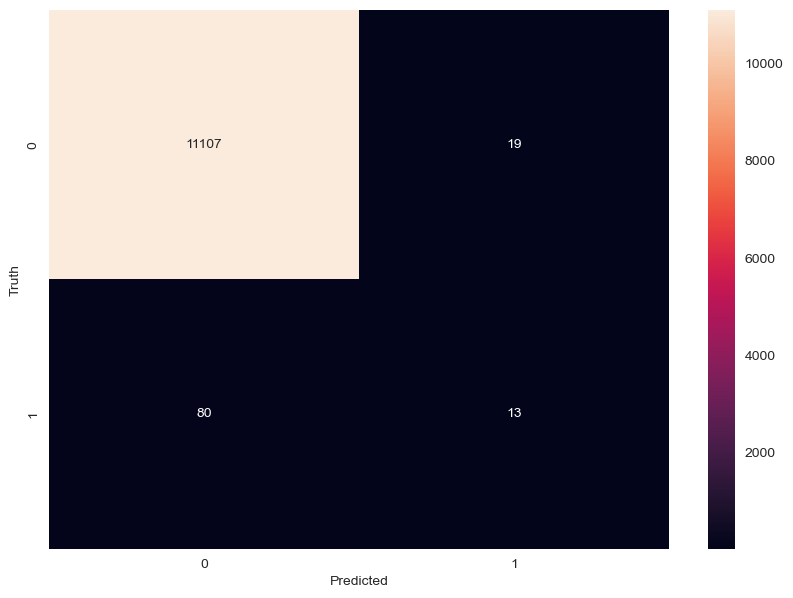

In [114]:
from matplotlib import pyplot as plt
import seaborn as sb
plt.figure(figsize=(10, 7))
sb.heatmap(cm,annot=True,fmt='g')
# sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Now, draw AUROC curve to check the performance of the model.

In [115]:
from sklearn.metrics import roc_curve

In [116]:
fpr, tpr, thresh = roc_curve(Y_test, y_pred[:,1], pos_label=1)

In [117]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [118]:
from sklearn.metrics import roc_auc_score

In [119]:
auc_score = roc_auc_score(Y_test, y_pred[:,1])

In [120]:
print(auc_score)

0.9696883595337087


In [121]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

D:\Tarun\TemporaryFiles\ipykernel_7688\4098886997.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


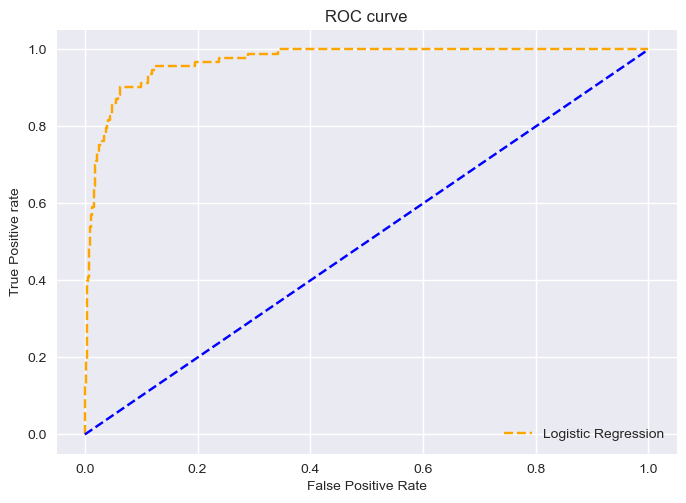

In [122]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Now, predict the target value on the actual test dataset.

In [123]:
y_pred_test = model.predict_proba(df_X_test)

In [124]:
y_pred_test

array([[0.999994, 0.000006],
       [0.999999, 0.000001],
       [0.999968, 0.000032],
       ...,
       [1.000000, 0.000000],
       [1.000000, 0.000000],
       [0.999994, 0.000006]])

In [127]:
df_result = pd.DataFrame()

In [128]:
df_result['player_id'] = df_player_id_test

In [135]:
df_result.tail(5)

,player_id,drafted
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,0.0
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,0.0
4967,f8df22c4-1602-4fab-896d-8820951aae2f,0.0
4968,b791c69a-f769-4163-afda-051a6fd20a9d,0.0
4969,18b51f5d-4746-4121-88fd-c8d0a1399130,0.0


In [130]:
df_result['drafted'] = y_pred_test[:,1]

In [132]:
result_csv_data = df_result.to_csv('D:\\Tarun\\UTS\\Subjects\\ADV ML\\advmla-2023-spring\\result_csv_data.csv', index = True)